In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('/home/tguethle/Documents/spi/Master_Thesis/main_files'))


import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import crab_fits

from chainconsumer import ChainConsumer
# matplotlib.rcParams.update(matplotlib.rcParamsDefault)


16:49:40 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=580409;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=507442;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=114762;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=413422;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=313857;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=363760;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

16:49:41 INFO      Starting 3ML!                                                                     ]8;id=499119;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=304262;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#31\31]8;;\

         WARNING   ROOT minimizer not available                                                ]8;id=859718;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=605978;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=969089;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=220210;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

16:49:41 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=539700;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=327775;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#79\79]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=968239;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=720152;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#129\129]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=35671;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=60329;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#129\129]8;;\
                  software installed and configured?                                                               

         WARNING   No fermitools installed                                              ]8;id=575171;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=470302;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Using the irfs that are valid between Start and 03/07/06 06:00:00 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 03/07/06 06:00:00 and 04/07/17 08:20:06 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 09/02/19 09:59:57 and 10/05/27 12:45:00 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)


In [2]:
base_path = "/home/tguethle/Documents/spi/Master_Thesis/"
config_2003 = crab_fits.config_low_e_break_2003[:3] + crab_fits.config_low_e_break_2003_additional[0:1] + crab_fits.config_low_e_break_2003[3:4] + crab_fits.config_low_e_break_2003_additional[1:]
config_2017 = crab_fits.config_low_e_break_2017[:3] + crab_fits.config_low_e_break_2017_additional[0:1] + crab_fits.config_low_e_break_2017[3:4] + crab_fits.config_low_e_break_2017_additional[1:]

# config_2003 = crab_fits.config_low_e_break_2003_no_bound
# config_2017 = crab_fits.config_low_e_break_2017_no_bound

# Testing
# for config in config_2003:
#     print(config["fit_path"])

fits_2003 = [base_path+config["fit_path"] for config in config_2003]
fits_2017 = [base_path+config["fit_path"] for config in config_2017]

In [3]:
vals_2003 = np.array([np.loadtxt(fit+"/fit_val.txt") for fit in fits_2003])
vals_2017 = np.array([np.loadtxt(fit+"/fit_val.txt") for fit in fits_2017])

err_2003 = np.array([np.sqrt(np.diag(np.loadtxt(fit+"/fit_cov.txt"))) for fit in fits_2003])
err_2017 = np.array([np.sqrt(np.diag(np.loadtxt(fit+"/fit_cov.txt"))) for fit in fits_2017])
err_2003.shape

(7, 6)

In [4]:
print(fits_2003)

['/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/fit_low_e_break_2003/crab_fit_20_400', '/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/fit_low_e_break_2003/crab_fit_25_400', '/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/fit_low_e_break_2003/crab_fit_30_400', '/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/fit_low_e_break_2003/crab_fit_35_400', '/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/fit_low_e_break_2003/crab_fit_40_400', '/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/fit_low_e_break_2003/crab_fit_45_400', '/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/fit_low_e_break_2003/crab_fit_50_400']


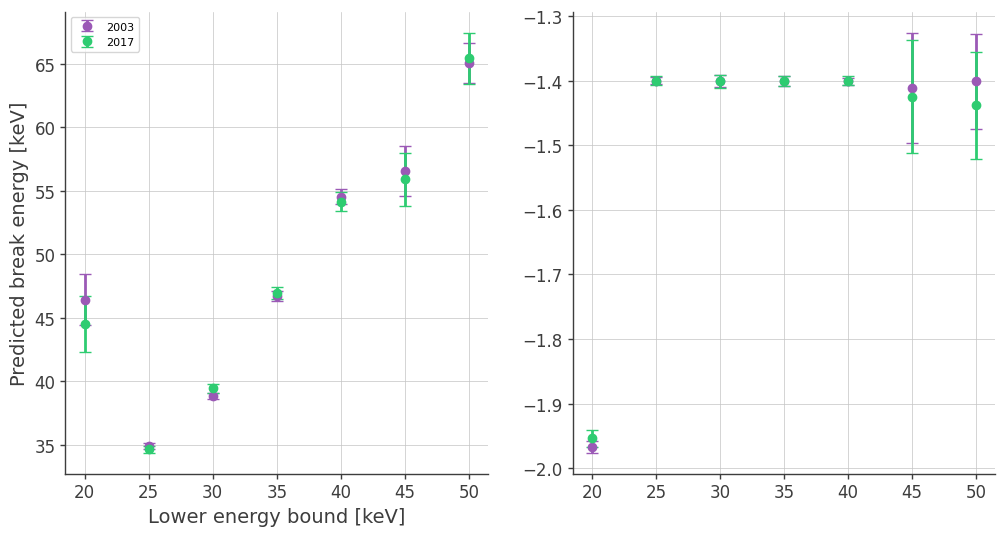

In [5]:
%matplotlib inline
fig, (ax,ax2) = plt.subplots(1,2, figsize=(12,6), sharex=True)

# ax.scatter((20,25,30,40), vals_2003[:,1], label="2003")
# ax.scatter((20,25,30,40), vals_2017[:,1], label="2017")

ax.set_xlabel("Lower energy bound [keV]")
ax.set_ylabel("Predicted break energy [keV]")

ax.grid()
ax2.grid()

low_e_bound_2003 = [int(fit.split("_")[-2]) for fit in fits_2003]
low_e_bound_2017 = [int(fit.split("_")[-2]) for fit in fits_2017]

ax2.errorbar(low_e_bound_2003, vals_2003[:,2], yerr=err_2003[:,2], fmt='o', capsize=4, label="2003")
ax2.errorbar(low_e_bound_2017, vals_2017[:,2], yerr=err_2017[:,2], fmt='o', capsize=4, label="2003")

ax.errorbar(low_e_bound_2003, vals_2003[:,1], yerr=err_2003[:,1], fmt='o', capsize=4, label="2003")
ax.errorbar(low_e_bound_2017, vals_2017[:,1], yerr=err_2017[:,1], fmt='o', capsize=4, label="2017")

ax.legend(loc="upper left")


In [6]:
params = crab_fits.config_low_e_break_2003[0]["p"]
params.extend(["$z$"])

In [14]:
cc_2003 = ChainConsumer()
cc_2017 = ChainConsumer()


for n,fit in enumerate(fits_2003):
    # params = crab_fits.config_low_e_break_2003[n]["p"]
    # params.extend(["$z$"])
    name = f"1,2-$\sigma$ broken powerlaw {fit.split('_')[-2]}-{fit.split('_')[-1]}keV"
    cc_2003.add_chain(np.loadtxt(fit+"/chain.dat"), parameters=params, name=name)


for n,fit in enumerate(fits_2017[0:]):
    # params = crab_fits.config_low_e_break_2003[n]["p"]
    # params.extend(["$z$"])
    name = f"1,2-$\sigma$ broken powerlaw {fit.split('_')[-2]}-{fit.split('_')[-1]}keV"

    cc_2017.add_chain(np.loadtxt(fit+"/chain.dat"), parameters=params, name=name)


cc_2003.configure(sigmas=[0,1,2], bins=20, kde=False, legend_artists=True, legend_color_text=False)
cc_2017.configure(sigmas=[0,1,2], bins=20, kde=False, legend_artists=True, legend_color_text=False)

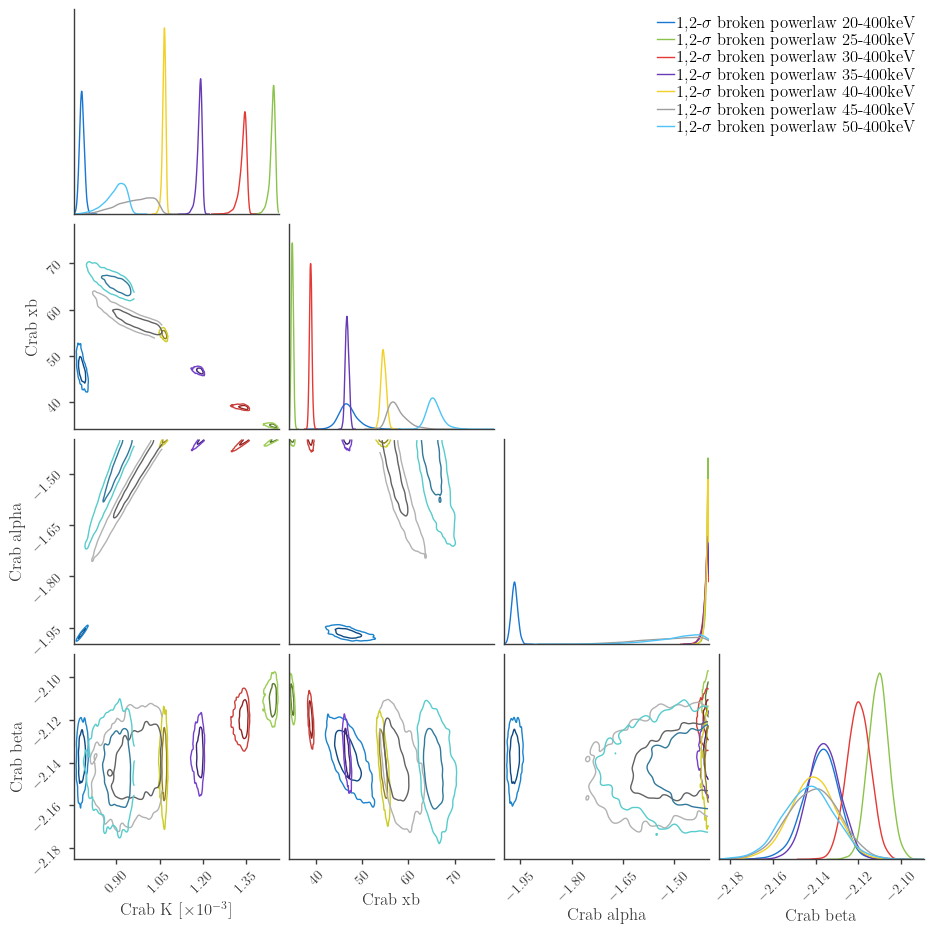

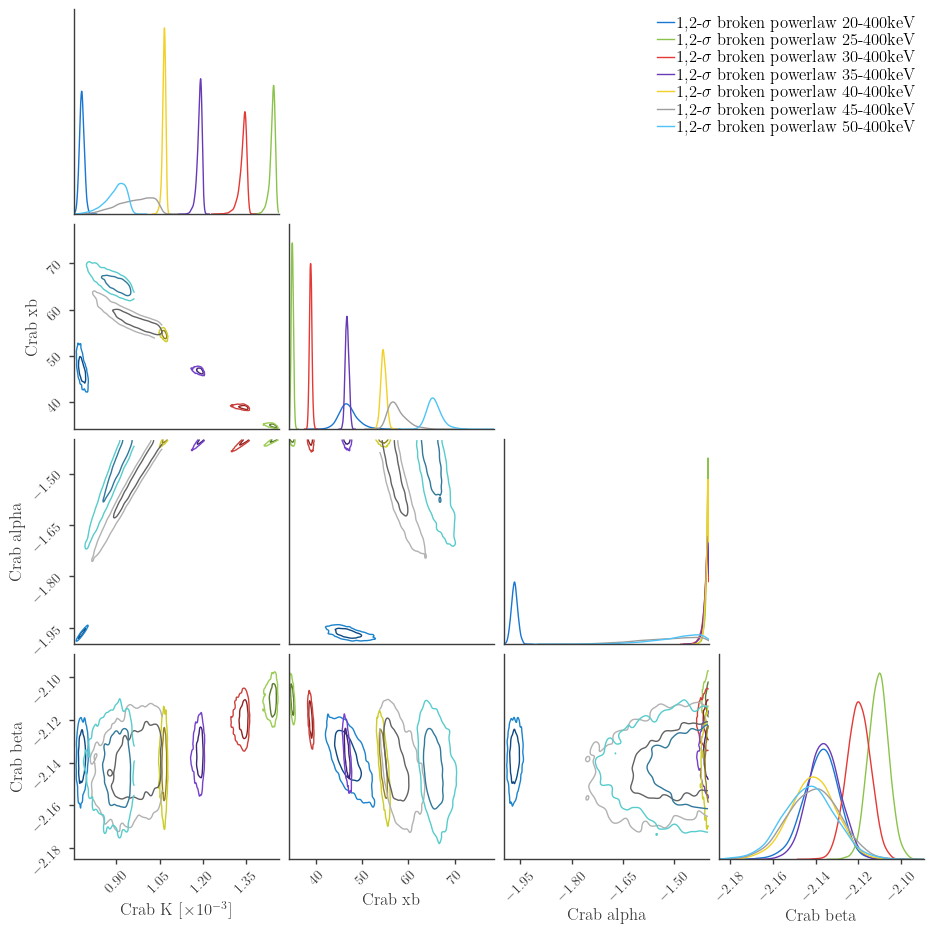

In [16]:
cc_2003.plotter.plot(figsize="PAGE", parameters=["Crab K","Crab xb", "Crab alpha", "Crab beta"], filename="crab_2003_low_e_chains.pdf")

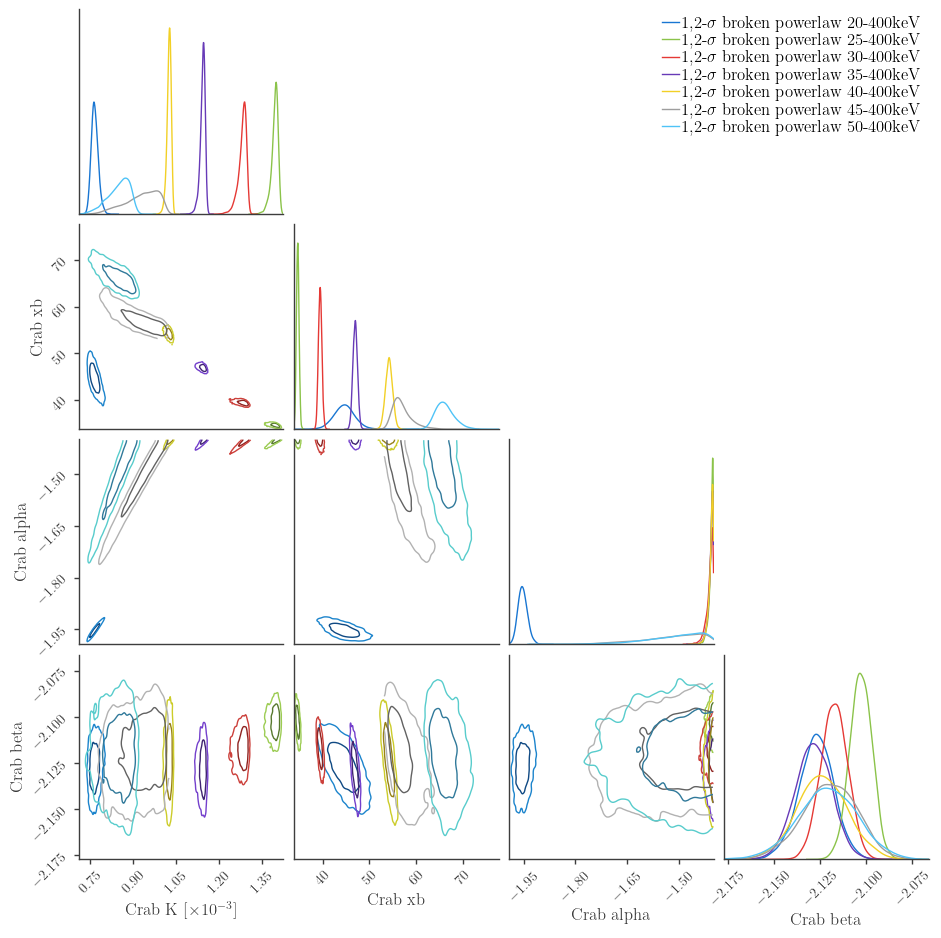

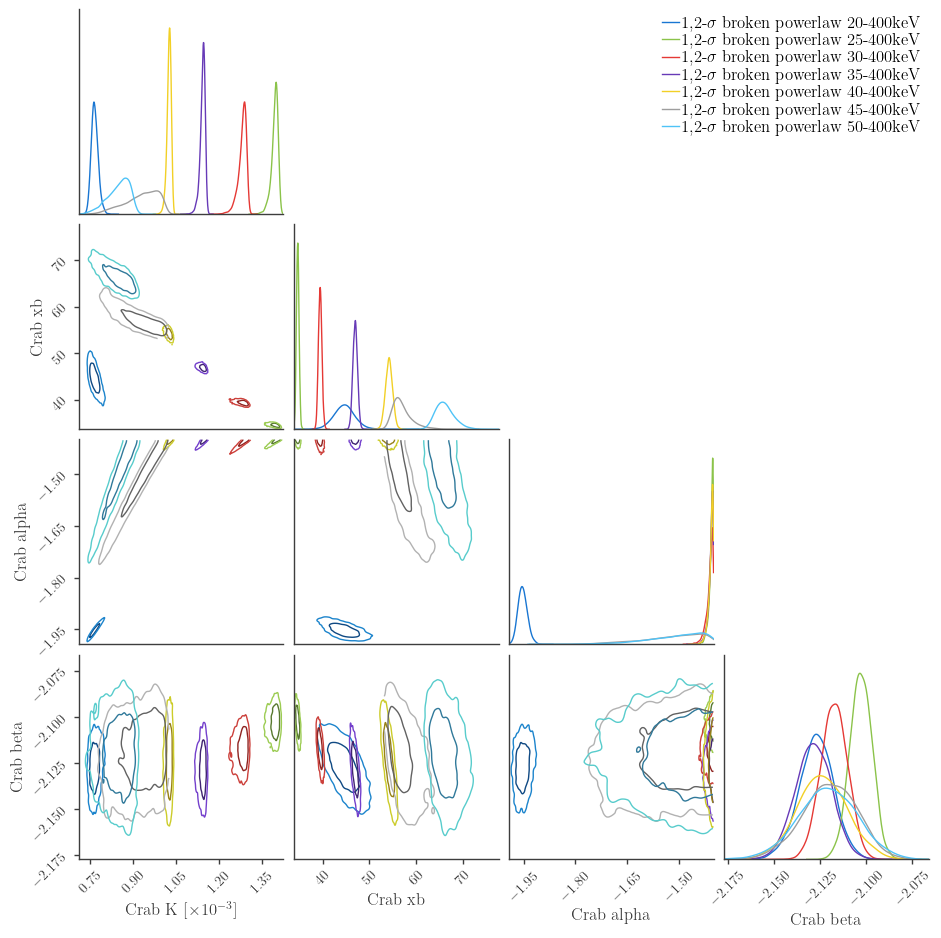

In [17]:
cc_2017.plotter.plot(figsize="PAGE", parameters=["Crab K","Crab xb", "Crab alpha", "Crab beta"], legend=True, filename="crab_2017_low_e_chains.pdf")

$$f(x)= K~\begin{cases}\left( \frac{x}{x_{b}} \right)^{\alpha} & x < x_{b} \\ \left( \frac{x}{x_{b}} \right)^{\beta} & x \ge x_{b} \end{cases}$$